In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(seed=42) 

In [2]:
raw_info = pd.read_csv(f"/ASD/ahsan_projects/braintypicality/dataset/csv-ADOSMartin.csv")
raw_info["Identifiers"] = raw_info["Identifiers"].apply(lambda x: x.split(",")[0])
raw_info['MetASDCutOff'].replace('#NULL!', np.nan, inplace=True)
raw_info['MetASDCutOff'] = raw_info['MetASDCutOff'].astype(float)
raw_info

,Identifiers,Group1LR2HR3HR4DS,CVD_Visit,RRBCSS_Mod1,RRBCSS_Mod2,RRBCSS_Mod3,RRBCSS_Combo,SACSS_Mod2,SACSS_Mod2_A,SACSS_Mod3,...,RRBTotalMod1,SARRBTotalMod1,SATotalMod1,RRBTotalMod2,SARRBTotalMod2,SATotalMod2,RRBTotalMod3,SARRBTotalMod3,SATotalMod3,MetASDCutOff
0,PHI0081,1,0,#NULL!,#NULL!,5,5,#NULL!,#NULL!,1,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,1,2,1,0.0
1,PHI0092,1,0,#NULL!,#NULL!,1,1,#NULL!,#NULL!,1,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,0,0.0
2,PHI0093,1,0,#NULL!,#NULL!,1,1,#NULL!,#NULL!,2,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,2,2,0.0
3,PHI0106,1,0,#NULL!,#NULL!,1,1,#NULL!,#NULL!,1,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,1,1,0.0
4,PHI0117,1,0,#NULL!,#NULL!,1,1,#NULL!,#NULL!,2,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,2,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,UNC4004,4,0,#NULL!,#NULL!,1,1,#NULL!,#NULL!,5,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,6,6,0.0
140,UNC4005,4,0,#NULL!,#NULL!,1,1,#NULL!,#NULL!,1,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,0,0.0
141,UNC4008,4,0,#NULL!,#NULL!,1,1,#NULL!,#NULL!,1,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,0,0.0
142,UNC4009,4,0,#NULL!,#NULL!,1,1,#NULL!,#NULL!,1,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,0,0.0


In [3]:
raw_info['MetASDCutOff'].sum()

44.0

In [4]:
raw_info["Identifiers"].duplicated().sum()

0

In [5]:
vsa_info = pd.read_csv(f"/ASD/ahsan_projects/braintypicality/dataset/VSADemographicsMar2023.csv")
vsa_info.rename(columns={"VSA demographics,CandID":"CandID"}, inplace=True)
vsa_info

,CandID,Identifiers,"VSA demographics,ASD_Ever_DSMIV","VSA demographics,ASD_Ever_DSMV","VSA demographics,Age_at_visit_start","VSA demographics,Risk","VSA demographics,Sex","VSA demographics,candidate_race"
0,103831,UNC0234,No DSMIV ever administered,No DSMV ever administered,131.0,NaN,Male,white
1,105477,SEA4003,ASD-,ASD-,136.0,NaN,Female,white
2,105784,UNC0239,"ASD+ (V24, V36)",No DSMV ever administered,134.0,NaN,Male,NaN
3,107524,STL0200,"ASD+ (V24, V36, VSA-CVD)","ASD+ (V36, VSA-CVD)",135.0,HR,Male,0
4,108131,SEA1006,ASD+ (V24),ASD+ (V24),84.0,HR,Male,white
...,...,...,...,...,...,...,...,...
418,988903,SEA0163,"ASD+ (V24, V36, VSA)","ASD+ (V36, VSA)",103.0,HR,Male,NaN
419,989241,PHI4005,ASD-,ASD-,87.0,NaN,Male,white
420,992063,STL0003,ASD-,ASD-,137.0,HR,Female,NaN
421,995004,STL0249,ASD-,ASD-,128.0,HR,Female,0


In [6]:
ados_info = raw_info.merge(vsa_info)
ados_info.head(3)

,Identifiers,Group1LR2HR3HR4DS,CVD_Visit,RRBCSS_Mod1,RRBCSS_Mod2,RRBCSS_Mod3,RRBCSS_Combo,SACSS_Mod2,SACSS_Mod2_A,SACSS_Mod3,...,SARRBTotalMod3,SATotalMod3,MetASDCutOff,CandID,"VSA demographics,ASD_Ever_DSMIV","VSA demographics,ASD_Ever_DSMV","VSA demographics,Age_at_visit_start","VSA demographics,Risk","VSA demographics,Sex","VSA demographics,candidate_race"
0,PHI0081,1,0,#NULL!,#NULL!,5,5,#NULL!,#NULL!,1,...,2,1,0.0,974644,ASD-,ASD-,130.0,LR,Male,NaN
1,PHI0092,1,0,#NULL!,#NULL!,1,1,#NULL!,#NULL!,1,...,0,0,0.0,762793,ASD-,ASD-,132.0,LR,Female,NaN
2,PHI0093,1,0,#NULL!,#NULL!,1,1,#NULL!,#NULL!,2,...,2,2,0.0,350868,ASD-,ASD-,131.0,LR,Male,NaN


In [7]:
ds_data = ados_info.query("Group1LR2HR3HR4DS == 4")
ds_data.head(3)

,Identifiers,Group1LR2HR3HR4DS,CVD_Visit,RRBCSS_Mod1,RRBCSS_Mod2,RRBCSS_Mod3,RRBCSS_Combo,SACSS_Mod2,SACSS_Mod2_A,SACSS_Mod3,...,SARRBTotalMod3,SATotalMod3,MetASDCutOff,CandID,"VSA demographics,ASD_Ever_DSMIV","VSA demographics,ASD_Ever_DSMV","VSA demographics,Age_at_visit_start","VSA demographics,Risk","VSA demographics,Sex","VSA demographics,candidate_race"
109,PHI4000,4,0,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,...,#NULL!,#NULL!,NaN,514978,ASD-,ASD-,113.0,NaN,Female,black_african_american
110,PHI4002,4,0,#NULL!,#NULL!,5,5,#NULL!,#NULL!,7,...,9,8,1.0,489641,ASD-,ASD-,119.0,NaN,Female,white
111,PHI4005,4,0,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,...,#NULL!,#NULL!,NaN,989241,ASD-,ASD-,87.0,NaN,Male,white


In [8]:
ds_data['MetASDCutOff'].value_counts()

0.0    22
1.0    11
Name: MetASDCutOff, dtype: int64

In [9]:
ds_candids = ds_data['CandID'].drop_duplicates().astype(str)

len(ds_candids)

35

In [10]:
ds_data.to_csv('/ASD/ahsan_projects/braintypicality/dataset/ds_metadata.csv', index=None)

### > **INTERSECT WITH SUBJECTS THAT WE ACTUALLY HAVE ON DISK!!!**

#### Grabbing VSA* - Adds post-covid scans to list

In [11]:
import glob,os,re
stx_regex = re.compile(r"stx_(\d*)_VSA_*")

In [12]:
procd_paths = glob.glob("/DATA/Users/amahmood/braintyp/processed_v2/IBIS*.nii.gz")
len(procd_paths)

326

In [13]:
t1_unprocd_paths = glob.glob("/ASD/Autism/IBIS/Proc_Data/*/VSA*/mri/registered_stx/sMRI/*T1w.nrrd")
len(t1_unprocd_paths)

331

In [14]:
t2_unprocd_paths = glob.glob("/ASD/Autism/IBIS/Proc_Data/*/VSA*/mri/registered_stx/sMRI/*T2w.nrrd")
len(t2_unprocd_paths)

327

In [15]:
t1_unprocd_paths[:3]

['/ASD/Autism/IBIS/Proc_Data/107524/VSA-CVD/mri/registered_stx/sMRI/stx_107524_VSA-CVD_T1w.nrrd',
 '/ASD/Autism/IBIS/Proc_Data/108131/VSA-CVD/mri/registered_stx/sMRI/stx_108131_VSA-CVD_T1w.nrrd',
 '/ASD/Autism/IBIS/Proc_Data/108372/VSA-CVD/mri/registered_stx/sMRI/stx_108372_VSA-CVD_T1w.nrrd']

In [16]:
t1_subject_ids = set(map( lambda x: stx_regex.search(x).group(1), t1_unprocd_paths))
len(t1_subject_ids)

331

In [17]:
t2_matched_unprocd_paths = []

for sid in t1_subject_ids:
    t2path = glob.glob(f"/ASD/Autism/IBIS/Proc_Data/{sid}/VSA*/mri/registered_stx/sMRI/*_{sid}*T2w.nrrd")
    if t2path:
        t2_matched_unprocd_paths.extend(t2path)

len(t2_matched_unprocd_paths)

327

In [18]:
t2_subject_ids = set(map( lambda x: stx_regex.search(x).group(1), t2_unprocd_paths))
len(t2_subject_ids)

327

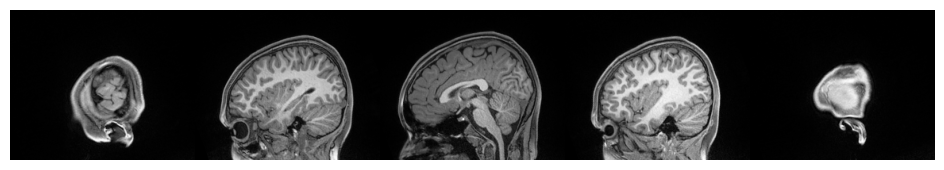

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (197, 233, 189)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-196.0, -232.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [19]:
import ants

t1_img = ants.image_read(t1_unprocd_paths[0])
t1_img.plot(nslices=5)
t1_img

In [20]:
R = re.compile(r"(\d*).nii.gz")
_fn = lambda x: R.search(x).group(1)
subject_ids = set(map(_fn, procd_paths))
len(subject_ids)

326

In [21]:
on_disk = ds_candids.isin(t2_subject_ids) & ds_candids.isin(t1_subject_ids)
ds_keys = ds_candids[on_disk]
ds_keys.shape

(28,)

In [22]:
# ds_candids[~on_disk].to_csv('missing_ds_candids.csv', index=None)
ds_candids[~on_disk]

111    989241
114    625742
118    411428
130    856429
134    187181
135    365282
139    439147
Name: CandID, dtype: object

#### We simply do not have the subjects on disk

Maybe they have not been processed yet? I am looking at /ASD/Autism/IBIS/Proc_Data/ ... 

In [23]:
ibis_ds_keys = "IBIS" + ds_keys.astype(str)
ibis_ds_keys.to_csv("ibis-ds-sa_keys.txt", header=None, index=None)

In [24]:
ibis_ds_keys

109    IBIS514978
110    IBIS489641
112    IBIS509327
113    IBIS847495
115    IBIS782429
116    IBIS965321
117    IBIS976405
119    IBIS767531
120    IBIS110925
121    IBIS688878
122    IBIS105477
123    IBIS615948
124    IBIS698925
125    IBIS123451
126    IBIS984945
127    IBIS493853
128    IBIS502237
129    IBIS718082
131    IBIS551622
132    IBIS792433
133    IBIS454736
136    IBIS546895
137    IBIS871442
138    IBIS146443
140    IBIS270140
141    IBIS241887
142    IBIS828516
143    IBIS734750
Name: CandID, dtype: object